# Преобразование сигнала при помощи коэффициентов функции Гаусса, посчитанных по аналитической формуле


In [4]:
import time

import matplotlib.pyplot as plt
from fwttools.fwt_tools import FwtTools
from fwttools.utils.analytiсal_gaussian import h_coeffs
from fwttools.utils.error import *

from common import signal

## Сигма = 0.5

Равенство Парсеваля: 4791000.0 = 4787915.0240350105
Время выполнения: 0.032546 секунд


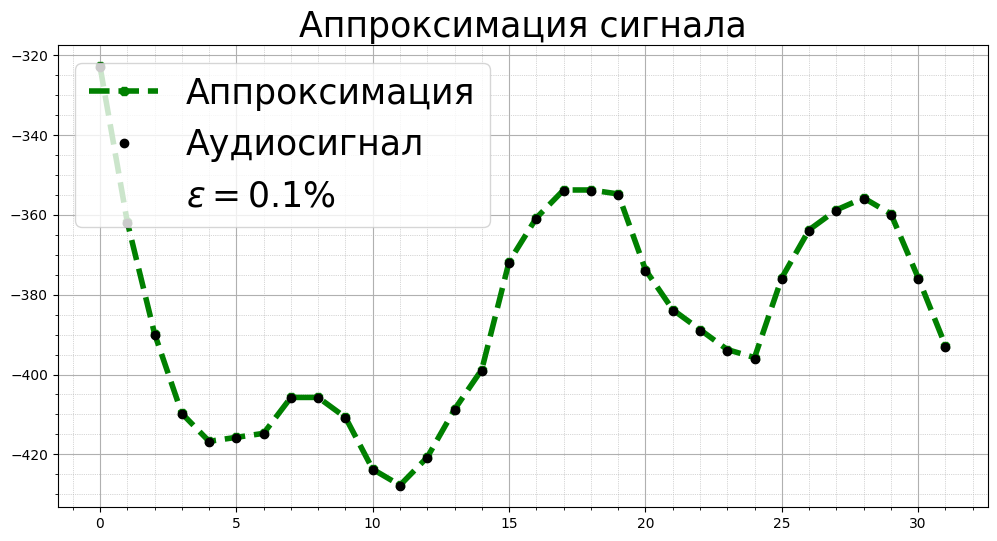

In [5]:
start_time = time.time()

h = h_coeffs(sigma=0.5, h_max=20)
kmin, kmax = 0, len(h) - 1

fwttools = FwtTools(h_coeffs=h, kmin=kmin, kmax=kmax)
transform = fwttools.fwt(signal=signal)
synthesized = fwttools.ifwt(wavelet_coefficients=transform)

end_time = time.time()
execution_time = end_time - start_time

left, right = parseval_identity(signal, transform)
error = relative_rmse_error(signal, synthesized) * 100

print(f"Равенство Парсеваля: {left} = {right}")
print(f"Время выполнения: {execution_time:.6f} секунд")

fig, ax = plt.subplots(figsize=(12, 6))
line1, = ax.plot(synthesized, label='Аппроксимация', color='green', linestyle='dashed', linewidth=4, marker='8')
line2, = ax.plot(signal, label='Аудиосигнал', color='black', linewidth=0, marker='o')
dummy_line = plt.Line2D([], [], color='none', label=rf'$\epsilon={error:.1f}\%$')


ax.grid(True, which="major", linestyle="-", linewidth=0.8)
ax.minorticks_on()
ax.grid(True, which="minor", linestyle=":", linewidth=0.5)

ax.legend(handles=[line1, line2, dummy_line], labelcolor="black", prop={'size': 25}, loc='upper left')
plt.title(f'Аппроксимация сигнала', fontsize=25)
plt.show()

## Сигма = 0.8

Равенство Парсеваля: 4791000.0 = 4777578.355254256
Время выполнения: 0.031353 секунд


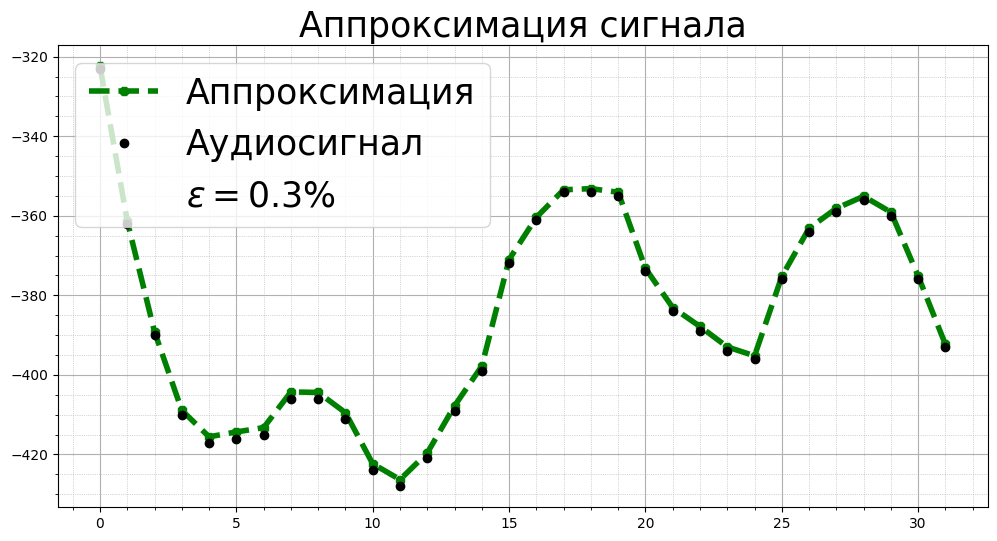

In [6]:
start_time = time.time()

h = h_coeffs(sigma=0.8, shift=0, h_max=20)
kmin, kmax = 0, len(h) - 1

fwttools = FwtTools(h_coeffs=h, kmin=kmin, kmax=kmax)
transform = fwttools.fwt(signal=signal)
synthesized = fwttools.ifwt(wavelet_coefficients=transform)

end_time = time.time()
execution_time = end_time - start_time

left, right = parseval_identity(signal, transform)
error = relative_rmse_error(signal, synthesized) * 100

print(f"Равенство Парсеваля: {left} = {right}")
print(f"Время выполнения: {execution_time:.6f} секунд")

fig, ax = plt.subplots(figsize=(12, 6))
line1, = ax.plot(synthesized, label='Аппроксимация', color='green', linestyle='dashed', linewidth=4, marker='8')
line2, = ax.plot(signal, label='Аудиосигнал', color='black', linewidth=0, marker='o')
dummy_line = plt.Line2D([], [], color='none', label=rf'$\epsilon={error:.1f}\%$')


ax.grid(True, which="major", linestyle="-", linewidth=0.8)
ax.minorticks_on()
ax.grid(True, which="minor", linestyle=":", linewidth=0.5)

ax.legend(handles=[line1, line2, dummy_line], labelcolor="black", prop={'size': 25}, loc='upper left')
plt.title(f'Аппроксимация сигнала', fontsize=25)
plt.show()